# BAD DAY 2: ANOVA  </font>

# 1. Analysis of variance: ANOVA models

In [2]:
# Setting the right working dir

bad2dir = getwd()
setwd(bad2dir)


Loading the data

In [3]:
# data=read.delim('./Data/growth.txt',header=TRUE)
data1 = read.csv('./Data/growth1.csv')

In [4]:
dim(data1)

[1] 31  2

In [5]:
colnames(data1)

[1] "Growth"    "Treatment"

In [6]:
summary(data1)

     Growth        Treatment
 Min.   : 5.00   A      :7  
 1st Qu.:14.00   B      :5  
 Median :36.00   C      :5  
 Mean   :38.68   Control:4  
 3rd Qu.:61.50   D      :5  
 Max.   :83.00   E      :5  

In [7]:
# making the objects in the dataframe accessible 
attach(data1)

In [8]:
Treatment

[1] C       C       C       C       C       E       E       E       E      
[10] E       D       D       D       D       D       A       A       A      
[19] A       A       A       A       B       B       B       B       B      
[28] Control Control Control Control
Levels: A B C Control D E

In this case we have a column for the *DEPENDENT* variable (Growth) and a column for the  *FACTOR* (Treatment). 

The first column contains numeric data but the second contains letters. It does not matter to R which form you have your dependent factors (letters or numbers) but it will be easier to interpret the results if you use meaningful names. 

### Ready to run the analysis. 

In [10]:
data.aov = aov(Growth ~ Treatment)

Notice here the symbol (a tilde) in the model. This means take Growth as the DEPENDENT variable, indeed it depends on the Treatment

In [11]:
#see the results: not very clear
data.aov

Call:
   aov(formula = Growth ~ Treatment)

Terms:
                Treatment Residuals
Sum of Squares  19459.167   973.607
Deg. of Freedom         5        25

Residual standard error: 6.240536
Estimated effects may be unbalanced

In [12]:
#We need to view the summary to have more information:

summary(data.aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Treatment    5  19459    3892   99.93 1.07e-15 ***
Residuals   25    974      39                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 2. Post-hoc testing

This was an example of a simple one-way anova. According to the summary we see that there is a significant effect of Treatment upon Growth. However, there are 5 treatments!

It is crucial to know which of these treatments are significantly different from the each other (e.g. control treatments). R provides a simple function to carry out the Tukey HSD test.

In [13]:
TukeyHSD(data.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Growth ~ Treatment)

$Treatment
               diff        lwr        upr     p adj
B-A       -12.65714 -23.918244  -1.396042 0.0211539
C-A        47.54286  36.281756  58.803958 0.0000000
Control-A -18.10714 -30.161431  -6.052855 0.0012274
D-A        32.94286  21.681756  44.203958 0.0000000
E-A        38.54286  27.281756  49.803958 0.0000000
C-B        60.20000  48.036621  72.363379 0.0000000
Control-B  -5.45000 -18.351212   7.451212 0.7812490
D-B        45.60000  33.436621  57.763379 0.0000000
E-B        51.20000  39.036621  63.363379 0.0000000
Control-C -65.65000 -78.551212 -52.748788 0.0000000
D-C       -14.60000 -26.763379  -2.436621 0.0121584
E-C        -9.00000 -21.163379   3.163379 0.2390481
D-Control  51.05000  38.148788  63.951212 0.0000000
E-Control  56.65000  43.748788  69.551212 0.0000000
E-D         5.60000  -6.563379  17.763379 0.7157067


# 3. Two way ANOVA

In [14]:
data2 = read.csv('./Data/growth2.csv')
names(data2)

[1] "Growth"    "Treatment" "Gender"

In [15]:
detach(data1)  # detach the previoulsy attached data set
attach(data2)  # making data2 accessible

In [16]:
Gender

[1] M M M F F F F M M M F F F M M M F F M M M F F F M M M F F M M F F M M
Levels: F M

In [17]:
Treatment

[1] C       C       C       C       C       E       E       E       E      
[10] E       D       D       D       D       D       A       A       A      
[19] A       A       A       A       B       B       B       B       B      
[28] Control Control Control Control Control Control Control Control
Levels: A B C Control D E

In [18]:
length(Gender)

[1] 35

We can compare the two times or the two shoes by looking at summary statistics or at parallel boxplots. To get the means for each level of each factor, use R's tapply command. 

This takes three arguments: the data you wish to summarize, the factor that determines the groups, and the function you wish to apply to each of the groups.


In [19]:
# First we will compute the mean Growth as a function of the Treatment type
tapply(Growth, Treatment, mean)

A        B        C  Control        D        E 
23.85714 11.20000 71.40000  6.00000 56.80000 62.40000

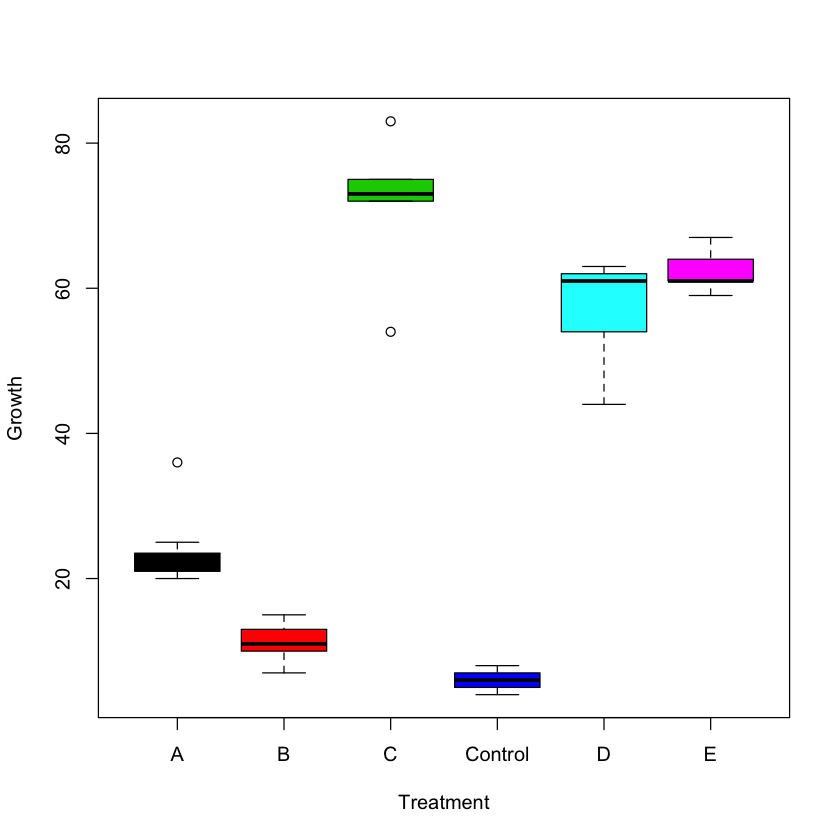

In [20]:
boxplot(Growth ~ Treatment, col = (1:6), ylab = 'Growth',
       xlab =  'Treatment')

In [21]:
# Now computing the mean growth as a function of age
tapply(Growth, Gender, mean)

F        M 
36.56250 33.63158

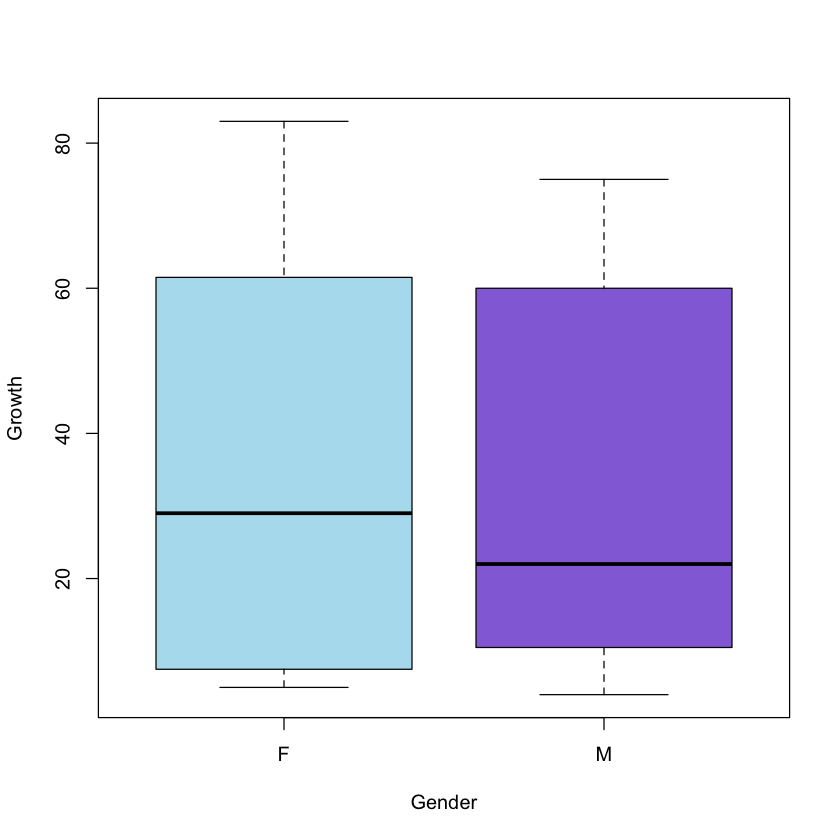

In [22]:
boxplot(Growth ~ Gender, col = c('lightblue2', 'mediumpurple'), xlab = 'Gender', 
        ylab = 'Growth')

Comparing the two sets of means, we could draw the following preliminary conclusions:
* Females grows more 
* The most effective treatment is E

But that could just be due to natural variability. We can check if this is the case by using a two way ANOVA analysis. 

 #### We prefer to start with a model taking into account the interaction between Gender and Treatment:

In [23]:
int <- aov(Growth ~ Gender * Treatment)
summary(int)

                 Df Sum Sq Mean Sq F value Pr(>F)    
Gender            1     75      75   2.272  0.145    
Treatment         5  23208    4642 141.340 <2e-16 ***
Gender:Treatment  5    129      26   0.783  0.572    
Residuals        23    755      33                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The p-value for the interaction term is >> 0.05 (not significant). 
This suggests we do not have to worry about their interaction! 

So we repeat the process using a simple additive model.

In [24]:
noint <- aov(Growth ~ Gender + Treatment)
summary(noint)

            Df Sum Sq Mean Sq F value Pr(>F)    
Gender       1     75      75   2.364  0.135    
Treatment    5  23208    4642 147.041 <2e-16 ***
Residuals   28    884      32                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

As you can see p-values for the Gender variable is quite large, suggesting
that any effect we saw could well have been due to chance!

## 4. N-way analysis of variance

This example will use the dataset `npk(Nitrogen - N, Phosphate - P, Potassium - K)` that is available in R with the MASS library (Modern Applied Statistics with S)

In [25]:
library(MASS)

In [26]:
npk
replications(yield ~ N * P * K, data = npk)

block,N,P,K,yield
1,0,1,1,49.5
1,1,1,0,62.8
1,0,0,0,46.8
1,1,0,1,57.0
2,1,0,0,59.8
2,1,1,1,58.5
2,0,0,1,55.5
2,0,1,0,56.0
3,0,1,0,62.8
3,1,1,1,55.8


N     P     K   N:P   N:K   P:K N:P:K 
   12    12    12     6     6     6     3

In [27]:
#tapply
#?npk

In [28]:
with(npk, tapply(yield, list(N,P), mean))

,0,1
0,51.71667,52.41667
1,59.21667,56.15000


In [29]:
with(npk, tapply(yield, list(N,K), mean))

,0,1
0,52.88333,51.25000
1,60.85000,54.51667


In [30]:
with(npk, tapply(yield, list(P,K), mean))

,0,1
0,57.60000,53.33333
1,56.13333,52.43333


In [31]:
npk.aov <- aov(yield ~ N * P * K, data = npk)

In [32]:
TukeyHSD(npk.aov, conf.level=.99);

  Tukey multiple comparisons of means
    99% family-wise confidence level

Fit: aov(formula = yield ~ N * P * K, data = npk)

$N
        diff        lwr      upr     p adj
1-0 5.616667 -0.9927112 12.22604 0.0245421

$P
         diff       lwr      upr     p adj
1-0 -1.183333 -7.792711 5.426044 0.6081875

$K
         diff       lwr      upr     p adj
1-0 -3.983333 -10.59271 2.626044 0.0974577

$`N:P`
             diff        lwr       upr     p adj
1:0-0:0  7.500000  -4.248642 19.248642 0.1294203
0:1-0:0  0.700000 -11.048642 12.448642 0.9961506
1:1-0:0  4.433333  -7.315308 16.181975 0.5257140
0:1-1:0 -6.800000 -18.548642  4.948642 0.1873570
1:1-1:0 -3.066667 -14.815308  8.681975 0.7743737
1:1-0:1  3.733333  -8.015308 15.481975 0.6554324

$`N:K`
             diff        lwr       upr     p adj
1:0-0:0  7.966667  -3.781975 19.715308 0.0999349
0:1-0:0 -1.633333 -13.381975 10.115308 0.9554188
1:1-0:0  1.633333 -10.115308 13.381975 0.9554188
0:1-1:0 -9.600000 -21.348642  2.148642 0.0382331


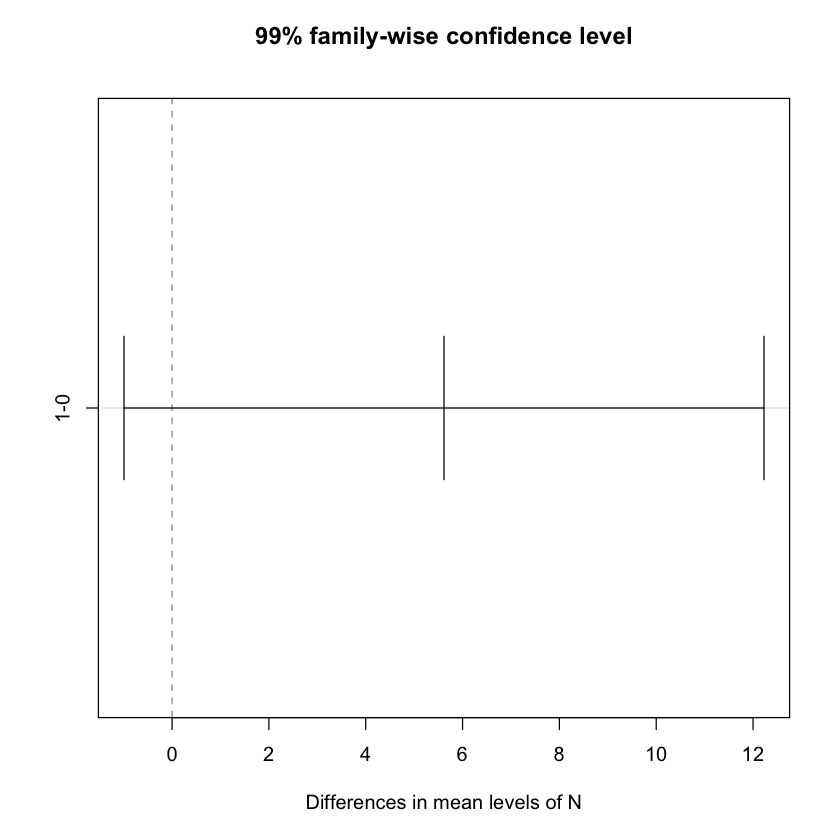

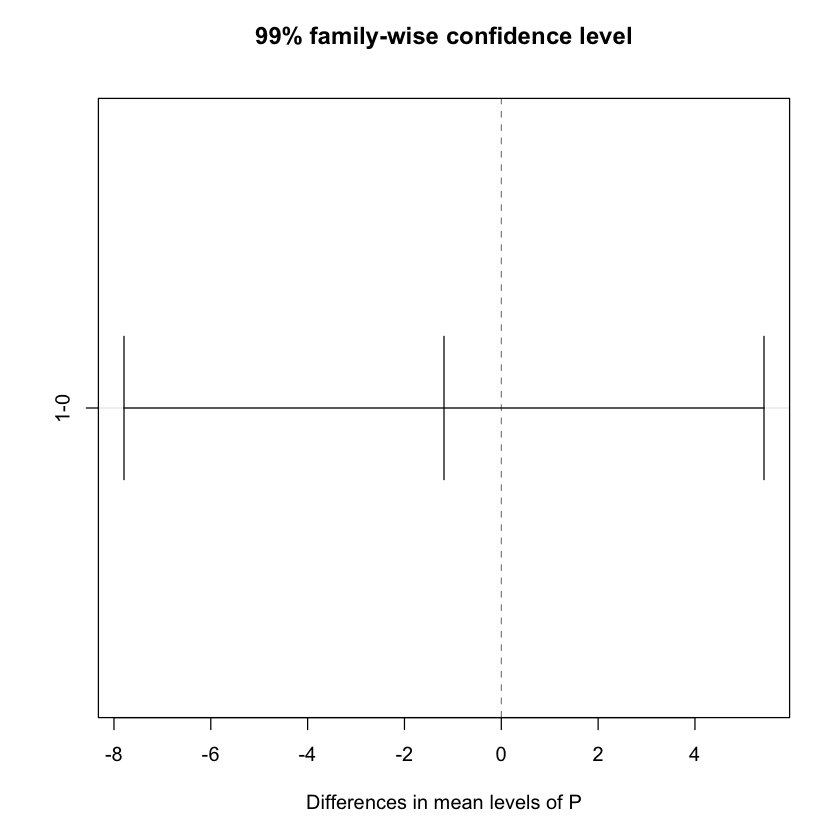

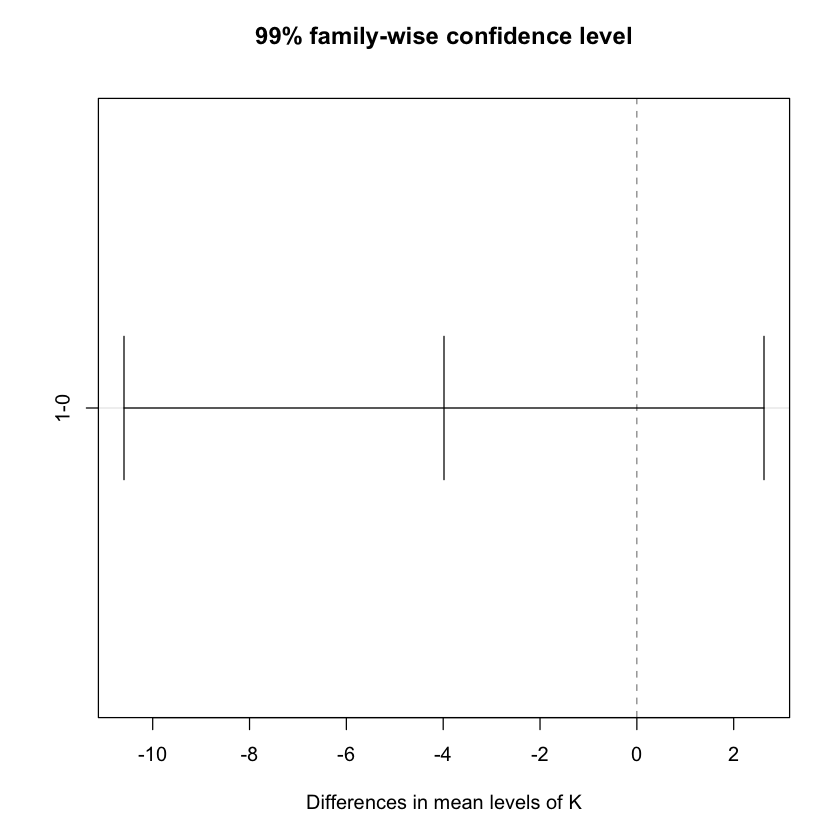

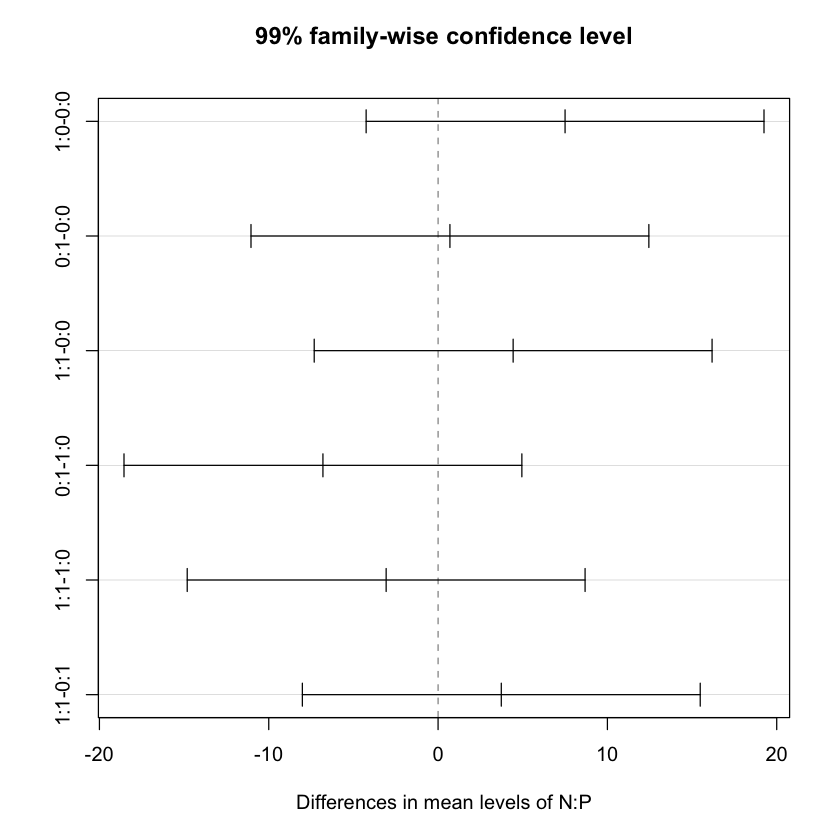

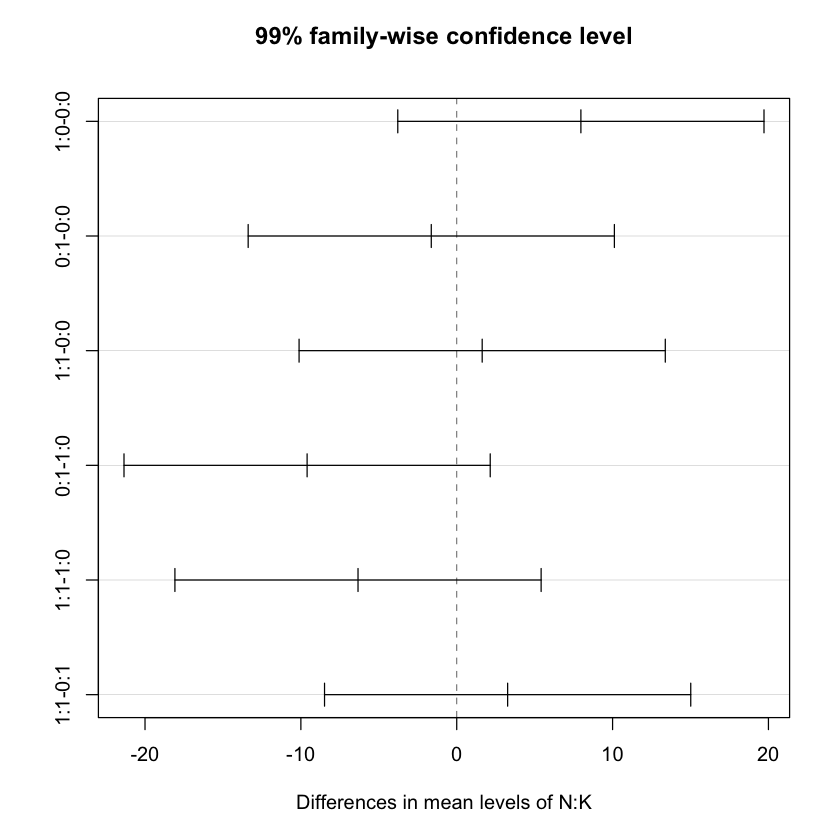

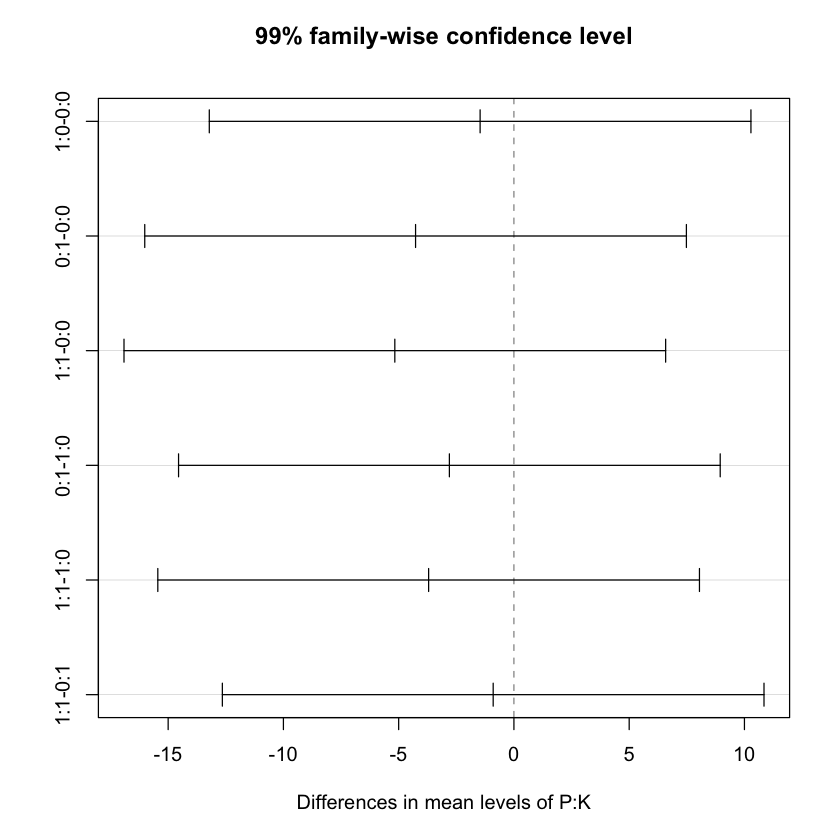

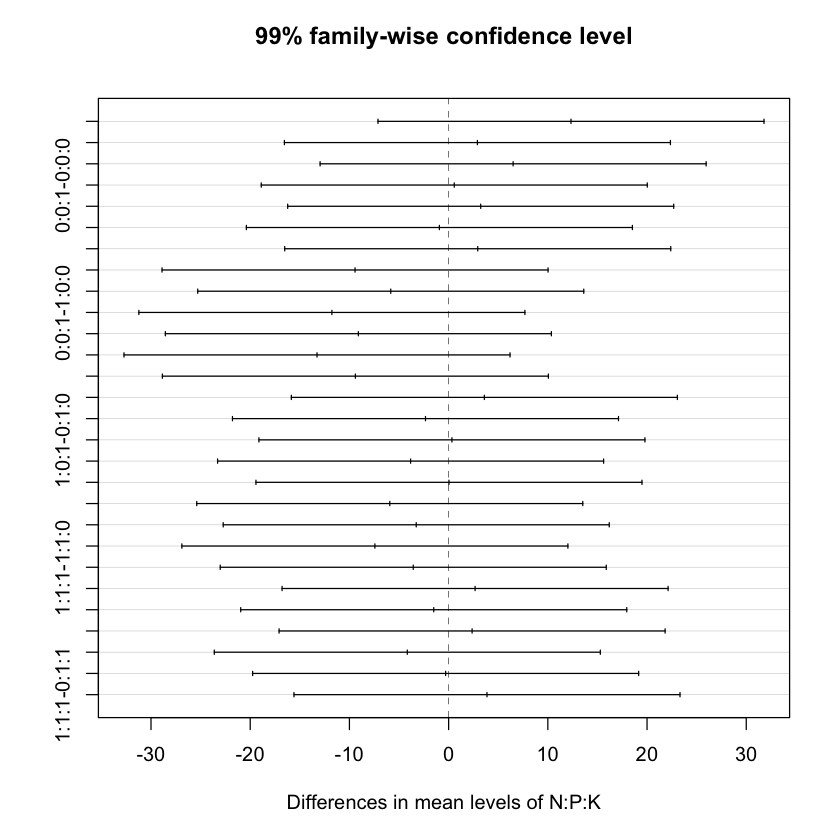

In [33]:
# Now plotting the results
plot(TukeyHSD(npk.aov, conf.level=.99))

In [34]:
summary(npk.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
N            1  189.3  189.28   6.161 0.0245 *
P            1    8.4    8.40   0.273 0.6082  
K            1   95.2   95.20   3.099 0.0975 .
N:P          1   21.3   21.28   0.693 0.4175  
N:K          1   33.1   33.14   1.078 0.3145  
P:K          1    0.5    0.48   0.016 0.9019  
N:P:K        1   37.0   37.00   1.204 0.2887  
Residuals   16  491.6   30.72                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## 5. Final Diagnostic

* Is an ANOVA analysis appropriate?
* Are the basics assumptions met?

We should test for normality of data and homogeneity of variance. 

* The Normal distribution can be tested by using a Q-Q plot: if the points follow Q-Q line then data follow a normal distribution! 

* Shapiro-Wilk test for normality tests a null hypothesis of normal data.

* The homogeneity of variance can be determined using the Bartlett Test of Homogeneity or 	Fligner-Killeen test of homogeneity of variances

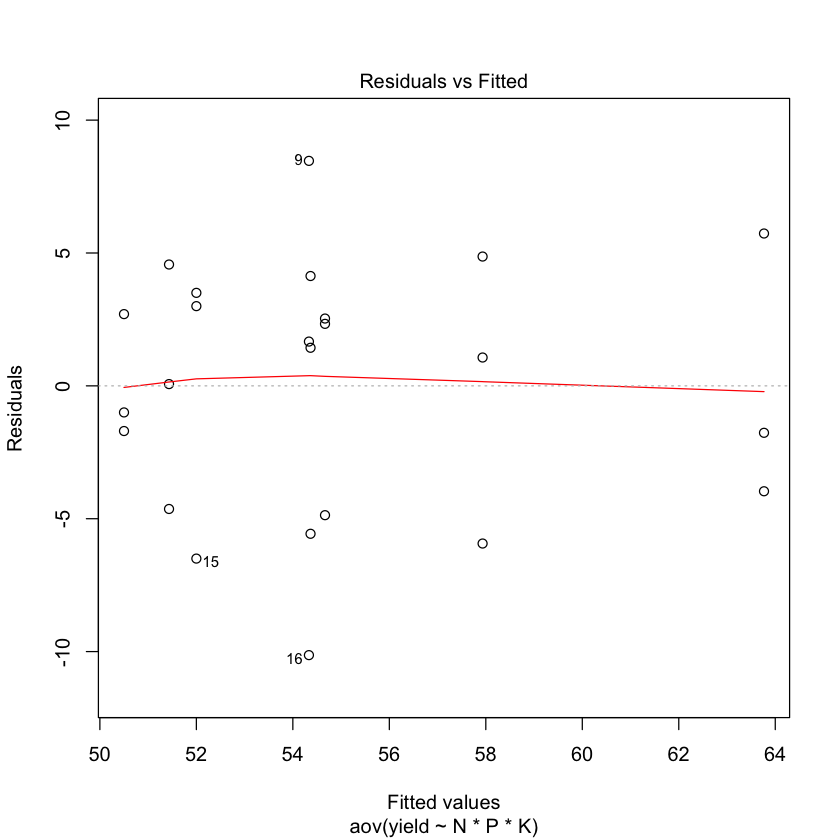

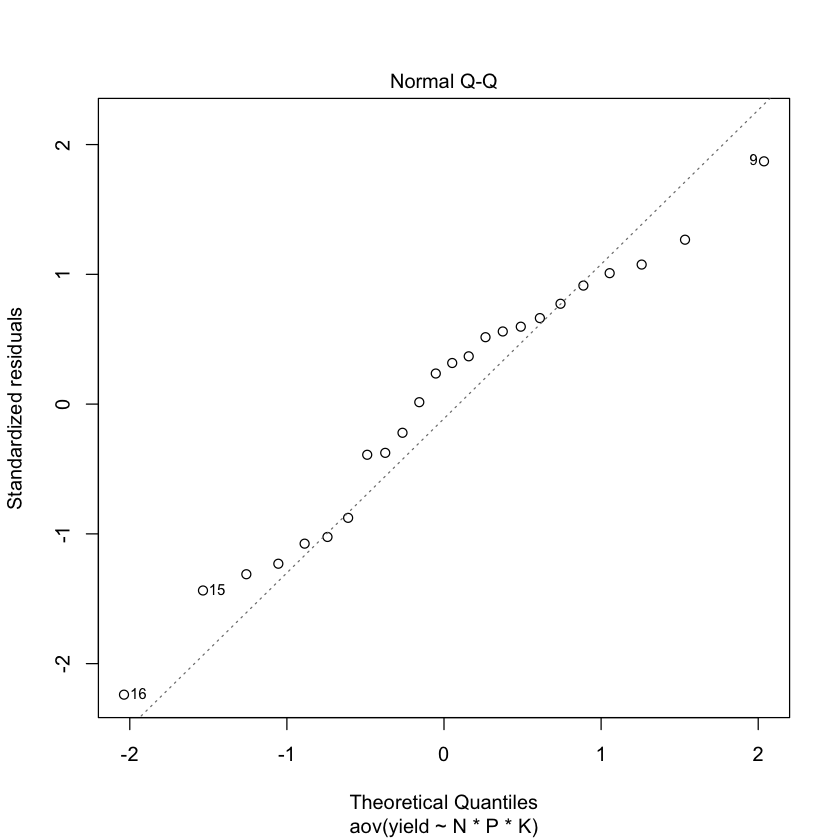

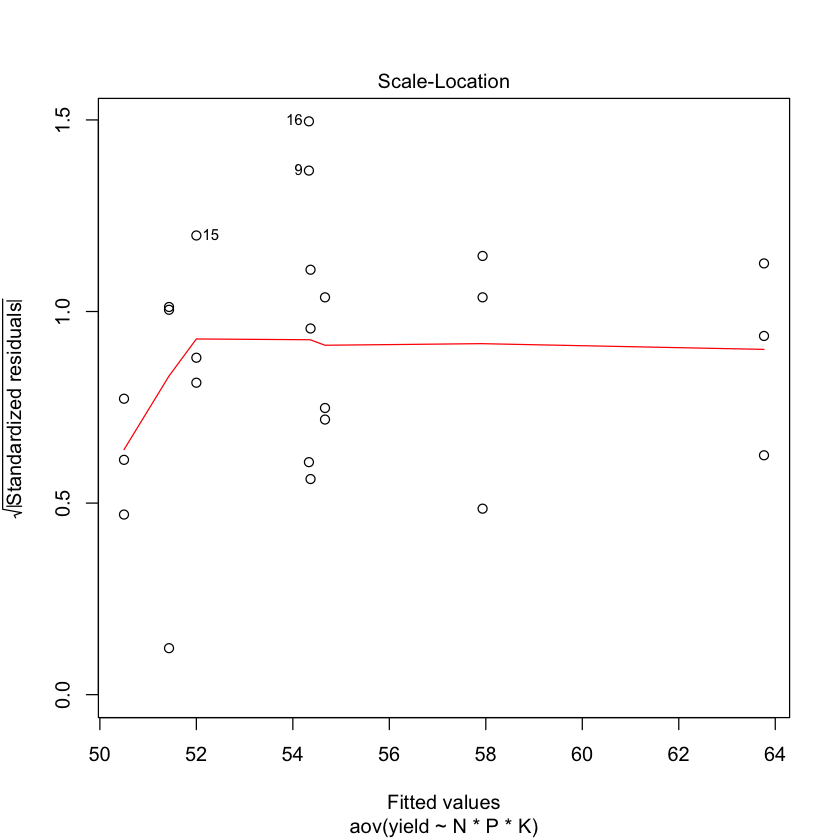

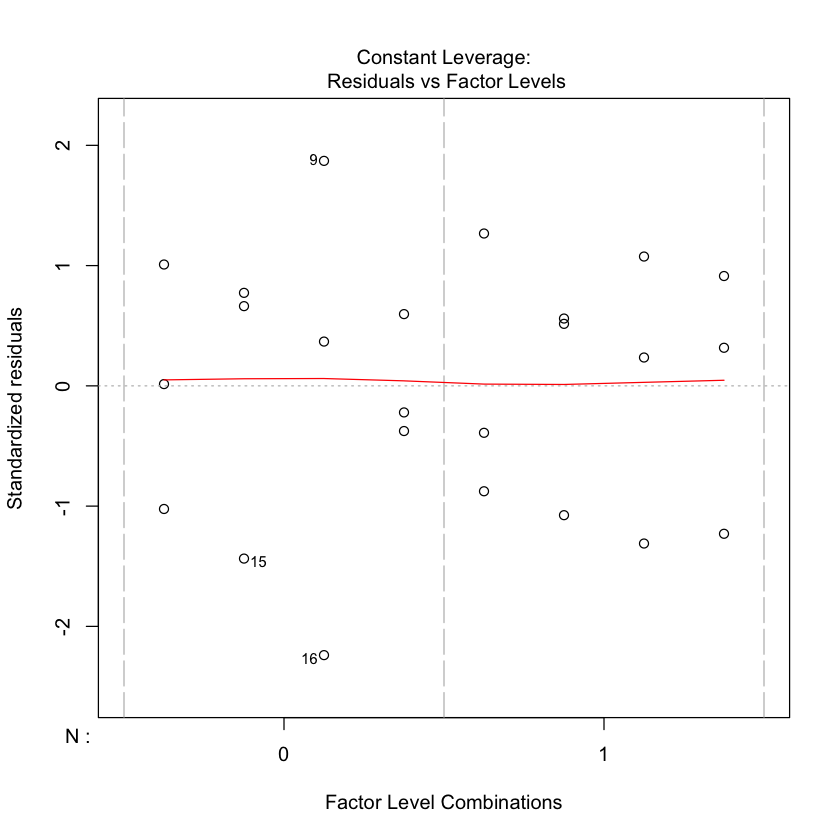

In [35]:
plot(npk.aov)

In [36]:
#plot.design(yield~N*P*K, data=npk);
#qqnorm(npk$yield); qqline(npk$yield, col=4)

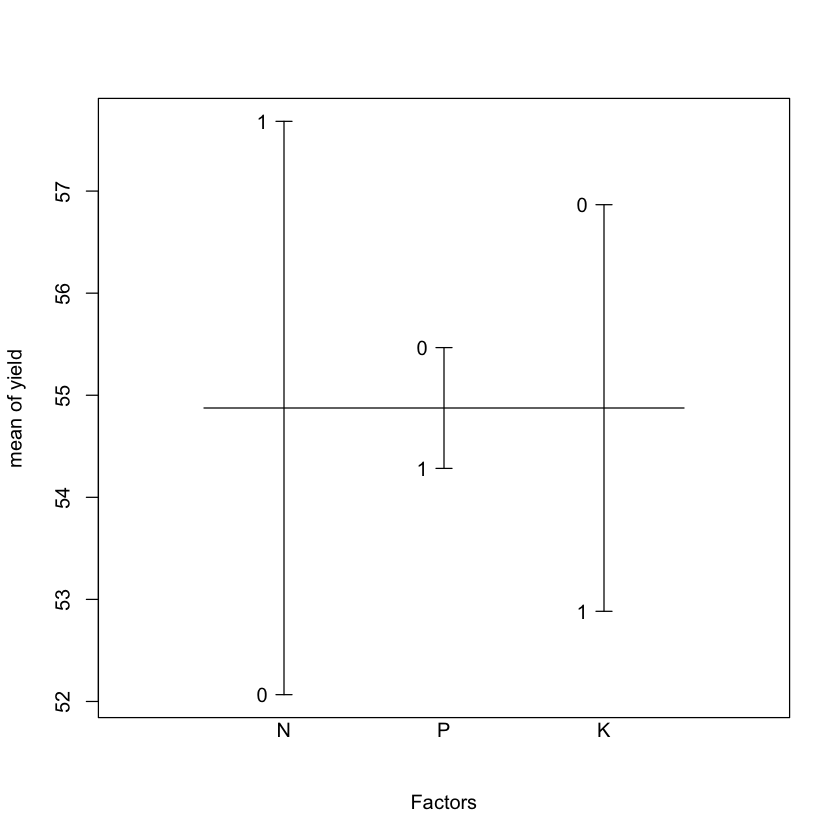

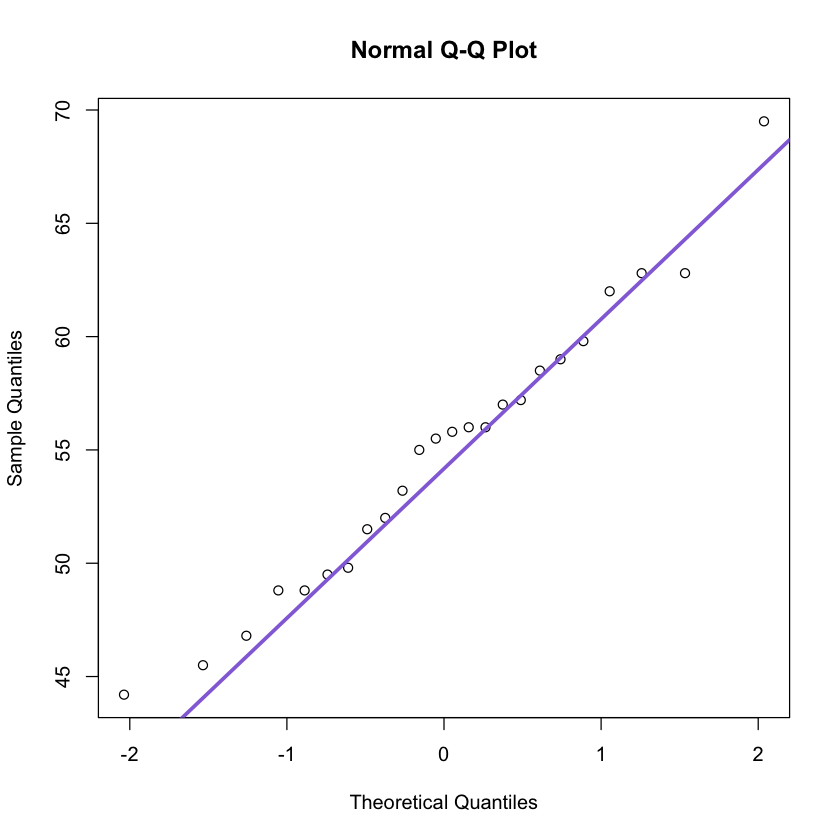

In [37]:
plot.design(yield~N*P*K, data = npk);

qqnorm(npk$yield); 
qqline(npk$yield, col = 'mediumpurple', lwd = 3)

In [38]:
by(npk$yield, npk$N, shapiro.test);
by(npk$yield, npk$P, shapiro.test);
by(npk$yield, npk$K, shapiro.test)

npk$N: 0

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95781, p-value = 0.7522

------------------------------------------------------------ 
npk$N: 1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.96418, p-value = 0.8414


npk$P: 0

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.96288, p-value = 0.824

------------------------------------------------------------ 
npk$P: 1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.95736, p-value = 0.7456


npk$K: 0

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.97207, p-value = 0.9313

------------------------------------------------------------ 
npk$K: 1

	Shapiro-Wilk normality test

data:  dd[x, ]
W = 0.91886, p-value = 0.2766


In [39]:
bartlett.test(npk$yield ~ npk$N)
bartlett.test(npk$yield ~ npk$P)
bartlett.test(npk$yield ~ npk$K)


	Bartlett test of homogeneity of variances

data:  npk$yield by npk$N
Bartlett's K-squared = 0.057652, df = 1, p-value = 0.8102



	Bartlett test of homogeneity of variances

data:  npk$yield by npk$P
Bartlett's K-squared = 0.1555, df = 1, p-value = 0.6933



	Bartlett test of homogeneity of variances

data:  npk$yield by npk$K
Bartlett's K-squared = 3.0059, df = 1, p-value = 0.08296


In [40]:
fligner.test(npk$yield ~ npk$N);
fligner.test(npk$yield ~ npk$P);
fligner.test(npk$yield ~ npk$K);


	Fligner-Killeen test of homogeneity of variances

data:  npk$yield by npk$N
Fligner-Killeen:med chi-squared = 0.010063, df = 1, p-value = 0.9201



	Fligner-Killeen test of homogeneity of variances

data:  npk$yield by npk$P
Fligner-Killeen:med chi-squared = 0.0070479, df = 1, p-value = 0.9331



	Fligner-Killeen test of homogeneity of variances

data:  npk$yield by npk$K
Fligner-Killeen:med chi-squared = 2.6046, df = 1, p-value = 0.1066
